<a href="https://colab.research.google.com/github/Svhugani/QOptics/blob/main/wartWlasneMir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install sympy

In [2]:
from sympy import *
init_printing()

Define real symbolic variables omega, gamma, Beta and "Hamiltionian"

---



In [3]:
omega, gamma_1, gamma_2, Beta = symbols("omega gamma_1 gamma_2 Beta", real = True)
H = Matrix(((omega - I * gamma_1, Beta, 0 ), (Beta, omega, Beta), (0, Beta, omega - I * gamma_2)))

In [4]:
H

⎡-ⅈ⋅γ₁ + ω  Β      0    ⎤
⎢                       ⎥
⎢    Β      ω      Β    ⎥
⎢                       ⎥
⎣    0      Β  -ⅈ⋅γ₂ + ω⎦

In [5]:
k = symbols("k", real = True)

In [6]:
H = H.subs([(gamma_1, omega), (gamma_2, omega / 2), (Beta, k * omega)])

In [7]:
H

⎡ω - ⅈ⋅ω  k⋅ω     0   ⎤
⎢                     ⎥
⎢  k⋅ω     ω     k⋅ω  ⎥
⎢                     ⎥
⎢                  ⅈ⋅ω⎥
⎢   0     k⋅ω  ω - ───⎥
⎣                   2 ⎦

In [8]:
H = H.subs(omega, 1)
H

⎡1 - ⅈ  k    0  ⎤
⎢               ⎥
⎢  k    1    k  ⎥
⎢               ⎥
⎢              ⅈ⎥
⎢  0    k  1 - ─⎥
⎣              2⎦

Let E be Dict of eigenvalues

In [9]:
E = H.eigenvals()

In [10]:
print("Eigenvals of a matrix : {}".format(E)) 

Eigenvals of a matrix : {-(6*k**2 - 15/2 + (-3 + 3*I/2)**2 + 9*I)/(3*(27*k**2*(4 - 3*I)/4 + sqrt(-4*(6*k**2 - 15/2 + (-3 + 3*I/2)**2 + 9*I)**3 + (27*k**2*(4 - 3*I)/2 - (-27 + 27*I/2)*(-2*k**2 + 5/2 - 3*I) - 27/2 + 81*I/2 + 2*(-3 + 3*I/2)**3)**2)/2 - (-27 + 27*I/2)*(-2*k**2 + 5/2 - 3*I)/2 - 27/4 + 81*I/4 + (-3 + 3*I/2)**3)**(1/3)) - (27*k**2*(4 - 3*I)/4 + sqrt(-4*(6*k**2 - 15/2 + (-3 + 3*I/2)**2 + 9*I)**3 + (27*k**2*(4 - 3*I)/2 - (-27 + 27*I/2)*(-2*k**2 + 5/2 - 3*I) - 27/2 + 81*I/2 + 2*(-3 + 3*I/2)**3)**2)/2 - (-27 + 27*I/2)*(-2*k**2 + 5/2 - 3*I)/2 - 27/4 + 81*I/4 + (-3 + 3*I/2)**3)**(1/3)/3 + 1 - I/2: 1, -(6*k**2 - 15/2 + (-3 + 3*I/2)**2 + 9*I)/(3*(-1/2 + sqrt(3)*I/2)*(27*k**2*(4 - 3*I)/4 + sqrt(-4*(6*k**2 - 15/2 + (-3 + 3*I/2)**2 + 9*I)**3 + (27*k**2*(4 - 3*I)/2 - (-27 + 27*I/2)*(-2*k**2 + 5/2 - 3*I) - 27/2 + 81*I/2 + 2*(-3 + 3*I/2)**3)**2)/2 - (-27 + 27*I/2)*(-2*k**2 + 5/2 - 3*I)/2 - 27/4 + 81*I/4 + (-3 + 3*I/2)**3)**(1/3)) - (-1/2 + sqrt(3)*I/2)*(27*k**2*(4 - 3*I)/4 + sqrt(-4*(6*k**

Convert dictionary keys (eigenvlaues) to list

In [11]:
eigenValsList = list(E.keys())

e0 - first eigenvalue

In [12]:
e0 = eigenValsList[0]
e1 = eigenValsList[1]
e2 = eigenValsList[2]

In [13]:
N(e2.subs(k, 0.3))

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

def EigenValVersusBeta(eigenval, kLinSpace, part):
  EigenvalOfK = list()
  for kPoint in kLinSpace:
    eigenvalSubs = eigenval.subs(k, kPoint)
    if part == "real":
      EigenvalOfK.append(re(N(eigenvalSubs)))
    elif part == "imaginary":
      EigenvalOfK.append(im(N(eigenvalSubs)))
  return EigenvalOfK


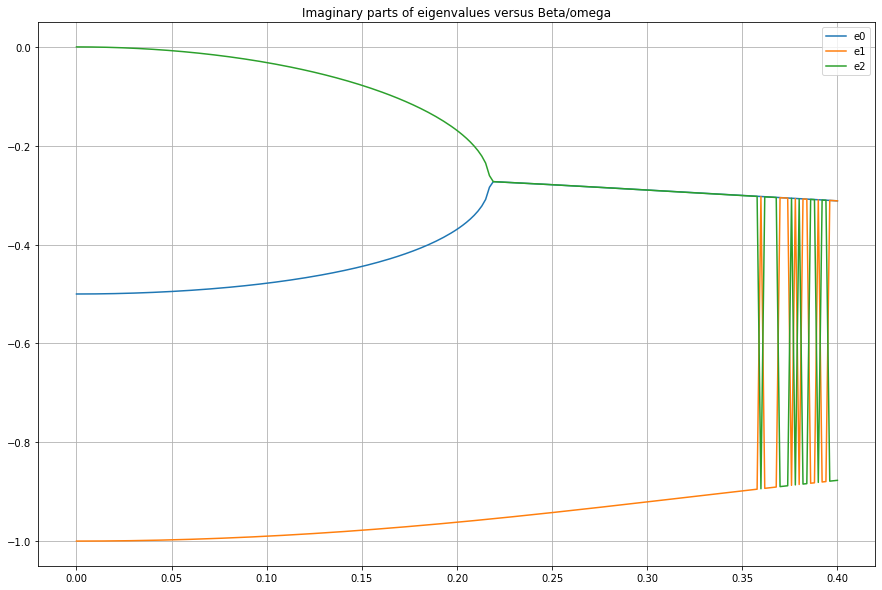

In [15]:
kLinSpace = np.linspace(0, 0.4, 200)
plt.subplots(figsize=(15,10))
plt.plot(kLinSpace, EigenValVersusBeta(e0, kLinSpace, "imaginary"), label = "e0")
plt.plot(kLinSpace, EigenValVersusBeta(e1, kLinSpace, "imaginary"), label = "e1")
plt.plot(kLinSpace, EigenValVersusBeta(e2, kLinSpace, "imaginary"), label = "e2")
plt.legend()
plt.title("Imaginary parts of eigenvalues versus Beta/omega")
plt.grid()
plt.show()

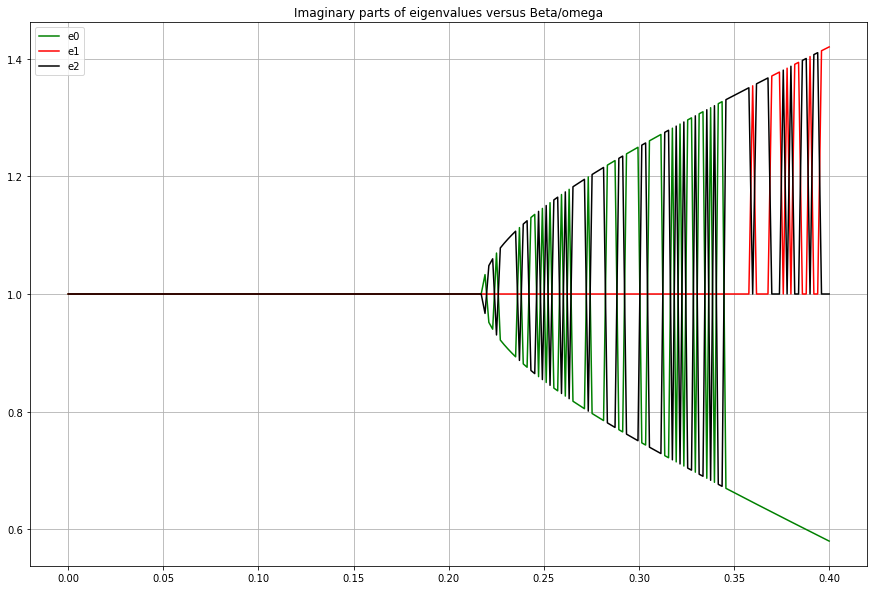

In [16]:
kLinSpace = np.linspace(0, 0.4, 200)
plt.subplots(figsize=(15,10))
plt.plot(kLinSpace, EigenValVersusBeta(e0, kLinSpace, "real"), label = "e0", color = 'green')
plt.plot(kLinSpace, EigenValVersusBeta(e1, kLinSpace, "real"), label = "e1", color = 'red')
plt.plot(kLinSpace, EigenValVersusBeta(e2, kLinSpace, "real"), label = "e2", color = 'black')
plt.legend()
plt.title("Imaginary parts of eigenvalues versus Beta/omega")
plt.grid()
plt.show()

In [ ]:
E